In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.table import Table, vstack, join
import hhana
sam = hhana.SuperCat('hsc-hugs')
hhana.add_regions_col(sam.cat)
sam_big = sam.copy()
sam_big.make_cuts(sam_big['FLUX_RADIUS(i)']>3.2/0.168)
sam_big.make_cuts(sam_big['candy']==1)

In [2]:
galex_hugs_ids = dict(
    AIS=[22, 25, 38, 55, 68, 76, 122, 238, 405, 409],
    MIS=[23, 110, 112, 115, 125, 127, 138, 139, 146, 
         158, 171, 173, 243, 286, 314, 320, 329, 331, 
         336, 351, 392],
    DIS=[19, 24, 48, 82],
    GII=[33, 115, 118, 119, 212, 215, 216, 230],
    NGS=[27, 33]
)

In [3]:
galex_all =  ascii.read('../../hsc-hugs-paper-I/data/MAST_xmatch_GALEX_with_3-6-2017-sample.csv')

In [4]:
12.5*15

187.5

In [5]:
galex = ascii.read('../../hsc-hugs-paper-I/data/MAST_xmatch_GALEX_with_3-6-2017-sample.csv')
galex.sort('distanceArcMin')
flag_cut = galex['nuv_artifact'] != 2
flag_cut &= galex['nuv_artifact'] != 4
#flag_cut &= galex['fuv_artifact'] != 4
galex = galex[flag_cut]
galex = galex[galex['nuv_mag']>0]
size_cut = sam[galex['hugs-id']]['FLUX_RADIUS(i)']>3.0/0.168
ra_cut = (sam[galex['hugs-id']]['ra'] < 6*15) | (sam[galex['hugs-id']]['ra'] > 11.9*15) 
galex = galex[size_cut & ra_cut]
    
AIS = galex[galex['survey']=='AIS']
DIS = galex[galex['survey']=='DIS']
GII = galex[galex['survey']=='GII']
MIS = galex[galex['survey']=='MIS']
NGS = galex[galex['survey']=='NGS']

for s in [AIS, DIS, GII, MIS, NGS]:
    try:
        print('{} has {} entries'.format(s['survey'][0], len(s)))
    except:
        pass

AIS has 34 entries
DIS has 24 entries
GII has 23 entries
MIS has 30 entries
NGS has 1 entries


AIS has 35 entries
DIS has 24 entries
GII has 23 entries
MIS has 30 entries
NGS has 1 entries


In [6]:
def get_unique(table):
    table_unique = Table()
    for hid in np.unique(table['hugs-id']):
        id_cut = table['hugs-id']==hid
        idx_min= np.argmin(table[id_cut]['nuv_magerr'])
        table_unique = vstack([table_unique, table[id_cut][idx_min]])
    return table_unique
AIS = get_unique(AIS)
MIS = get_unique(MIS)
DIS = get_unique(DIS)
GII = get_unique(GII)
NGS = get_unique(NGS)
galex = get_unique(galex)

for s in [AIS, DIS, GII, MIS, NGS]:
    try:
        print('{} has {} unique entries'.format(s['survey'][0], len(s)))
    except:
        pass

AIS has 29 unique entries
DIS has 10 unique entries
GII has 20 unique entries
MIS has 24 unique entries
NGS has 1 unique entries


In [7]:
galex.sort('nuv_mag')

In [8]:
AIS.sort('nuv_mag')
MIS.sort('nuv_mag')

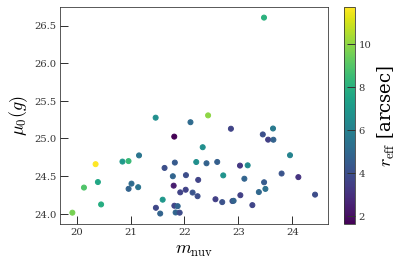

In [9]:
plt.scatter(galex['nuv_mag'], sam[galex['hugs-id']]['mu_aper_0(g)'], c=sam[galex['hugs-id']]['r_e(g)'])
cb = plt.colorbar()
cb.ax.set_ylabel(r'$r_\mathrm{eff}$ [arcsec]', fontsize=18)
plt.xlabel(r'$m_\mathrm{nuv}$', fontsize=18)
plt.ylabel(r'$\mu_0(g)$', fontsize=18)

In [10]:
from astropy.coordinates import SkyCoord

In [24]:
sam[sam['hugs-id']==115]['mu_aper_0(g)', 'PA']

mu_aper_0(g),PA
float64,float64
24.3474773856,104.735


In [22]:
sam[sam['hugs-id']==25]['MAG_AUTO(g)', 'MAG_AUTO(i)', 'm_tot(g)', 'm_tot(i)', 'PA']

MAG_AUTO(g),MAG_AUTO(i),m_tot(g),m_tot(i),PA
float64,float64,float64,float64,float64
19.5564,19.2182,19.5335924106,19.1612041303,104.407


In [13]:
size = 200
for obj in galex:
    hid = obj['hugs-id']
    sc = SkyCoord(obj['ra'], obj['dec'], unit='deg')
    print('hsc-hugs #{}; coord = {}, mag_nuv = {}'.format(hid, sc.to_string('hmsdms'), obj['nuv_mag']))
    hhana.nbtools.display_galex_compare(hid, size=size, survey=obj['survey'])

hsc-hugs #125; coord = 14h01m53.9109s -01d20m34.4098s, mag_nuv = 19.9232


hsc-hugs #115; coord = 11h59m43.5494s -00d46m21.6128s, mag_nuv = 20.13779


hsc-hugs #118; coord = 12h04m55.5753s -00d41m44.1488s, mag_nuv = 20.35331


hsc-hugs #395; coord = 15h46m57.8886s +42d35m50.2155s, mag_nuv = 20.39625


hsc-hugs #27; coord = 02h37m55.4872s -06d15m23.7057s, mag_nuv = 20.45533


hsc-hugs #239; coord = 14h06m17.2952s +00d37m45.872s, mag_nuv = 20.8509


hsc-hugs #68; coord = 02h33m31.0645s -04d08m56.5368s, mag_nuv = 20.96328


hsc-hugs #25; coord = 02h29m17.0663s -06d24m57.6404s, mag_nuv = 20.96442


hsc-hugs #215; coord = 12h04m46.2387s +01d17m54.4267s, mag_nuv = 21.01833


hsc-hugs #405; coord = 16h12m45.6324s +42d47m41.3032s, mag_nuv = 21.1418


hsc-hugs #127; coord = 13h58m51.5404s -00d53m27.7476s, mag_nuv = 21.15779


hsc-hugs #230; coord = 12h08m07.0419s +00d52m04.4464s, mag_nuv = 21.46568


hsc-hugs #146; coord = 14h44m29.2121s -00d07m06.5048s, mag_nuv = 21.47039


hsc-hugs #64; coord = 02h30m16.9587s -04d12m55.438s, mag_nuv = 21.55024


hsc-hugs #286; coord = 22h31m19.9565s +01d06m52.132s, mag_nuv = 21.5958


hsc-hugs #351; coord = 22h09m42.4811s +01d43m51.5606s, mag_nuv = 21.63071


hsc-hugs #139; coord = 14h20m04.9645s -00d26m09.1835s, mag_nuv = 21.78429


hsc-hugs #138; coord = 14h21m01.052s -01d00m08.1118s, mag_nuv = 21.79939


hsc-hugs #243; coord = 14h21m07.9092s +00d53m06.6133s, mag_nuv = 21.81045


hsc-hugs #55; coord = 01h59m20.8973s -03d17m32.8883s, mag_nuv = 21.81247


hsc-hugs #14; coord = 02h09m05.4797s -06d18m26.3145s, mag_nuv = 21.8211


hsc-hugs #76; coord = 02h10m31.6269s -02d52m34.8732s, mag_nuv = 21.83562


hsc-hugs #238; coord = 14h06m40.0501s +00d08m50.7771s, mag_nuv = 21.874


hsc-hugs #171; coord = 22h43m13.2885s -00d54m39.3306s, mag_nuv = 21.91069


hsc-hugs #23; coord = 02h24m59.2378s -06d40m07.9472s, mag_nuv = 21.92147


hsc-hugs #119; coord = 12h01m25.5433s -00d18m46.2785s, mag_nuv = 22.02215


hsc-hugs #173; coord = 22h40m13.1805s -00d57m00.8553s, mag_nuv = 22.02698


hsc-hugs #416; coord = 15h48m10.479s +43d09m24.9946s, mag_nuv = 22.11093


hsc-hugs #39; coord = 01h56m23.6731s -04d39m22.5974s, mag_nuv = 22.15023


hsc-hugs #237; coord = 14h09m59.7801s +01d28m12.1339s, mag_nuv = 22.21761


hsc-hugs #255; coord = 14h43m24.0774s +00d57m04.5076s, mag_nuv = 22.24211


hsc-hugs #22; coord = 02h14m22.002s -06d48m19.0494s, mag_nuv = 22.2538


hsc-hugs #236; coord = 13h59m36.6016s +00d47m30.4796s, mag_nuv = 22.33725


hsc-hugs #38; coord = 01h56m28.8898s -05d37m40.5824s, mag_nuv = 22.40771


hsc-hugs #48; coord = 02h21m15.6809s -05d32m20.2699s, mag_nuv = 22.43702


hsc-hugs #305; coord = 22h54m00.2064s +00d17m23.0702s, mag_nuv = 22.57364


hsc-hugs #158; coord = 22h08m51.6822s -01d11m54.472s, mag_nuv = 22.60622


hsc-hugs #212; coord = 11h55m50.809s +00d04m53.6635s, mag_nuv = 22.69895


hsc-hugs #33; coord = 02h38m46.8091s -06d14m11.7995s, mag_nuv = 22.71778


hsc-hugs #5; coord = 02h05m27.8468s -06d18m06.092s, mag_nuv = 22.85996


hsc-hugs #21; coord = 02h15m16.5527s -06d25m26.688s, mag_nuv = 22.88807


hsc-hugs #37; coord = 02h00m04.911s -05d18m21.8438s, mag_nuv = 22.90967


hsc-hugs #19; coord = 02h18m48.8617s -06d45m55.4001s, mag_nuv = 23.0279


hsc-hugs #409; coord = 16h19m05.6435s +41d58m16.5886s, mag_nuv = 23.03486


hsc-hugs #61; coord = 02h25m50.4472s -04d24m07.5247s, mag_nuv = 23.10913


hsc-hugs #122; coord = 14h04m41.9593s -01d22m27.1416s, mag_nuv = 23.17028


hsc-hugs #290; coord = 22h37m16.466s +01d07m49.5925s, mag_nuv = 23.25718


hsc-hugs #0; coord = 02h00m51.5667s -06d57m11.2844s, mag_nuv = 23.37741


hsc-hugs #20; coord = 02h18m34.6388s -06d12m32.1001s, mag_nuv = 23.45038


hsc-hugs #43; coord = 02h10m21.1216s -05d58m12.5274s, mag_nuv = 23.47296


hsc-hugs #10; coord = 02h11m19.0283s -06d28m13.6598s, mag_nuv = 23.47447


hsc-hugs #216; coord = 12h04m07.8421s +01d19m17.4735s, mag_nuv = 23.49888


hsc-hugs #82; coord = 02h22m02.7238s -02d39m02.7584s, mag_nuv = 23.54897


hsc-hugs #117; coord = 11h57m29.688s -01d16m04.4533s, mag_nuv = 23.63975


hsc-hugs #280; coord = 22h18m19.7674s +01d14m50.1088s, mag_nuv = 23.64686


hsc-hugs #258; coord = 14h39m50.8786s +00d21m11.0138s, mag_nuv = 23.79876


hsc-hugs #24; coord = 02h20m03.9902s -06d34m31.621s, mag_nuv = 23.95457


hsc-hugs #355; coord = 22h11m47.3087s +02d46m16.5631s, mag_nuv = 24.10907


hsc-hugs #47; coord = 02h21m47.7618s -05d39m01.1394s, mag_nuv = 24.4185


In [14]:
print('hours restricted to', 12.5*15, 6*15, 'hours')

hours restricted to 187.5 90 hours


In [6]:
if False:
    region = 4
    sam_reg = sam.copy()
    sam_reg.cat = sam_reg[galex_hugs_ids['MIS']]
    sam_reg.cat = sam_reg[sam_reg['region']==region]
    sam_reg.cat = sam_reg[sam_reg['FLUX_RADIUS(i)']>3.0/0.168]
    fig, ax = hhana.plot.circles_on_region(sam_big[sam_big['region']==region], 
                                           fp=footprints[region].cat, sam_kws={'c':'r'})
    hhana.plot.circles_on_region(sam_reg, subplots=(fig, ax), sam_kws={'c':'b'});

In [10]:
proposed_hugs_ids = dict(
    MIS=[138, 139, 146, 243, 115, 173, 158, 125],
    GII=[118, 212, 119, 230, 215],
    NGS=[27]
)

In [ ]:
surveys = ['MIS', 'GII', 'NGS']
size = 200
for survey in surveys:
    for hid in proposed_hugs_ids[survey]:
        print('hsc-hugs #{}'.format(hid))
        hhana.nbtools.display_galex_compare(hid, size=size, survey=survey)

In [11]:
def difference_matrix(a):
    x = np.reshape(a, (len(a), 1))
    return x - x.transpose()

In [ ]:
match = Table()
max_diffs = []
for hid in proposed_hugs_ids['GII']:
    match = vstack([match, galex[galex['hugs-id']==hid].copy()])
    nuv = galex[galex['hugs-id']==hid]['nuv_mag']
    max_diffs.append(difference_matrix(nuv).max())
    print(hid,difference_matrix(nuv).max())
plt.hist(max_diffs);

In [11]:
galex_unique = get_unique(galex.copy())
galex_unique = join(galex_unique, sam.cat, keys='hugs-id')
match = Table()
for row in proposed_hugs_ids.values():
    for hid in row:
        match = vstack([match, galex_unique[galex_unique['hugs-id']==hid].copy()])

In [32]:
cols = ['hugs-id','MatchRA', 'MatchDEC', 'nuv_mag', 'nuv_magerr', 'm_tot(g)', 
        'mu_aper_0(g)', 'm_tot(i)', 'mu_aper_0(i)', 'survey']
match_pd = match[cols].to_pandas()

In [34]:
match_pd.to_csv('/Users/protostar/Desktop/gemini-ft-sample.csv', index=False)